In [109]:
## Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

# Metrics to evaluate the model
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    classification_report,
    precision_recall_curve
)




In [61]:
data = pd.read_csv("ACME-HappinessSurvey2020.csv")
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


There are no missing values

In [63]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Y,126.0,0.547619,0.499714,0.0,0.0,1.0,1.0,1.0
X1,126.0,4.333333,0.800000,1.0,4.0,5.0,5.0,5.0
X2,126.0,2.531746,1.114892,1.0,2.0,3.0,3.0,5.0
X3,126.0,3.309524,1.023440,1.0,3.0,3.0,4.0,5.0
X4,126.0,3.746032,0.875776,1.0,3.0,4.0,4.0,5.0
X5,126.0,3.650794,1.147641,1.0,3.0,4.0,4.0,5.0
X6,126.0,4.253968,0.809311,1.0,4.0,4.0,5.0,5.0


- about 54% are happy with the service 
- we can note that X2 variable : "contents of my order was as I expected", has the lowest average rate 


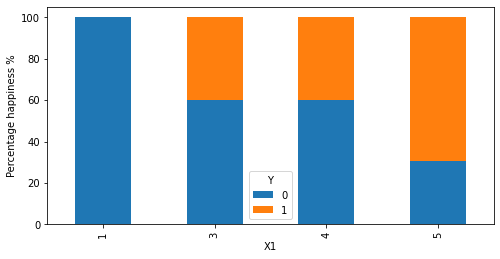

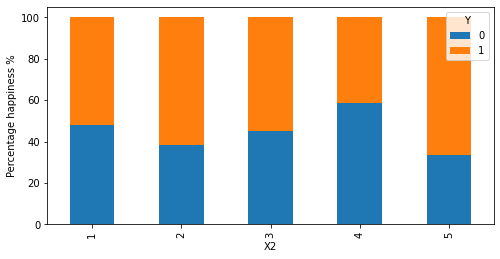

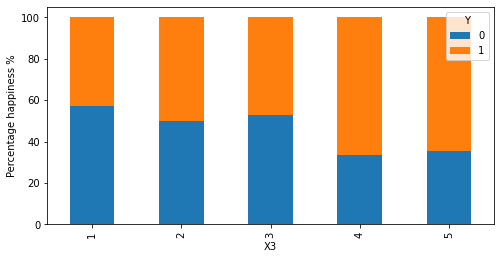

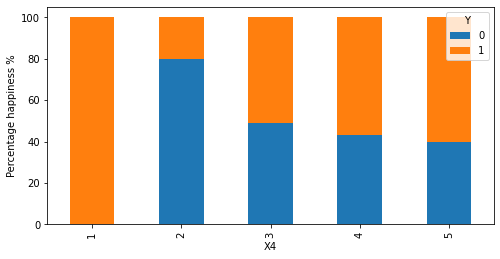

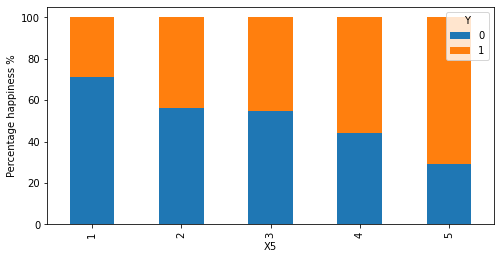

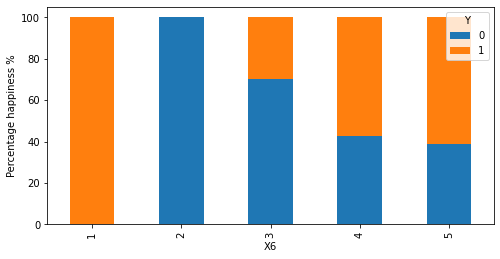

In [64]:
X_variables = ["X1", "X2", "X3","X4", "X5", "X6"]

for i in X_variables:
    (pd.crosstab(data[i],data['Y'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
    plt.ylabel('Percentage happiness %')

-  most questions as the rate increase, percent of cisutmers who like the service increase
- in questions 4 and 6 peaple  rate is 1 but at the end they still like the servies. 

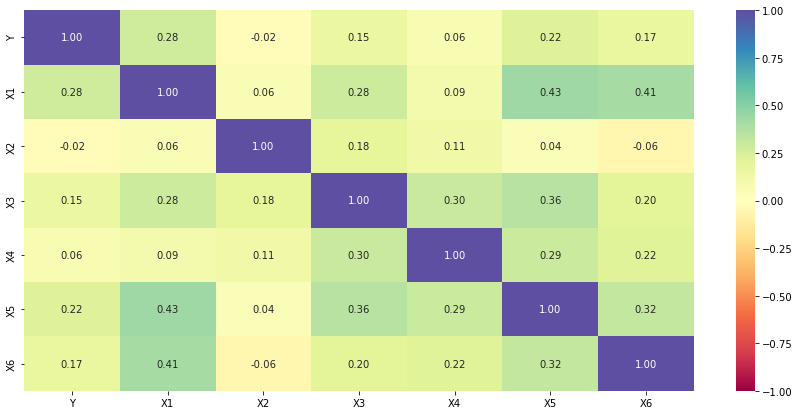

In [65]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [66]:
y = data["Y"]
X= data.drop(columns = ['Y'])
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [67]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Building classification model

In [68]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.52      0.63      0.57        19
           1       0.53      0.42      0.47        19

    accuracy                           0.53        38
   macro avg       0.53      0.53      0.52        38
weighted avg       0.53      0.53      0.52        38



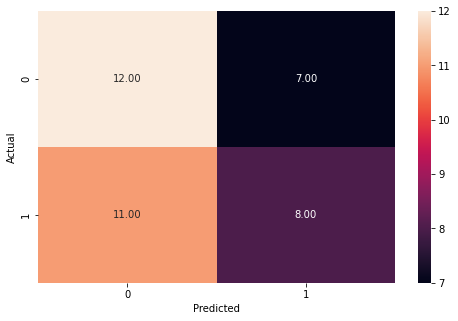

In [69]:
pred_test_dt = dt.predict(X_test)
metrics_score(Y_test, pred_test_dt)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        38
           1       1.00      0.90      0.95        50

    accuracy                           0.94        88
   macro avg       0.94      0.95      0.94        88
weighted avg       0.95      0.94      0.94        88



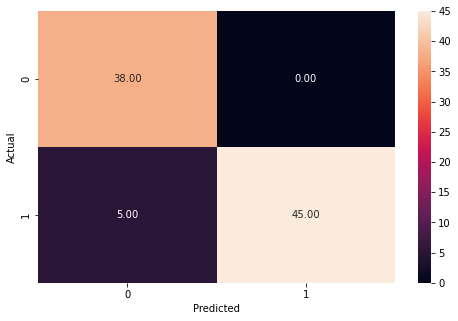

In [70]:
pred_test_dt = dt.predict(X_train)
metrics_score(Y_train, pred_test_dt)

the model show overfitting and not good in predicting testing set

In [71]:
## lets try to fine tune the model
parameters = [ {'max_depth': [2, 4, 6, 10], 'min_samples_leaf': [2, 3, 4, 5, 7], 'min_samples_split' : [2, 3, 4, 5, 6]}]
grid_search = GridSearchCV(estimator = dt,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train,Y_train)

In [72]:
grid_search.best_score_

0.6482758620689655

In [73]:
grid_search.best_params_


{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 4}

              precision    recall  f1-score   support

           0       0.67      0.63      0.65        19
           1       0.65      0.68      0.67        19

    accuracy                           0.66        38
   macro avg       0.66      0.66      0.66        38
weighted avg       0.66      0.66      0.66        38



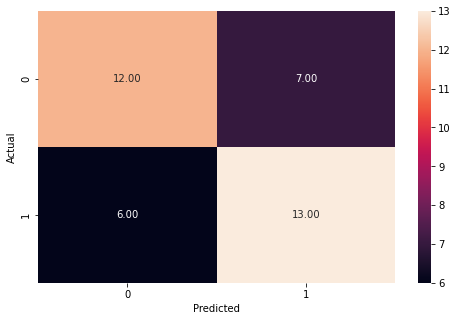

In [74]:
# predict on test set
pred_test_dt = grid_search.predict(X_test)
metrics_score(Y_test, pred_test_dt)

              precision    recall  f1-score   support

           0       0.74      0.68      0.71        38
           1       0.77      0.82      0.80        50

    accuracy                           0.76        88
   macro avg       0.76      0.75      0.75        88
weighted avg       0.76      0.76      0.76        88



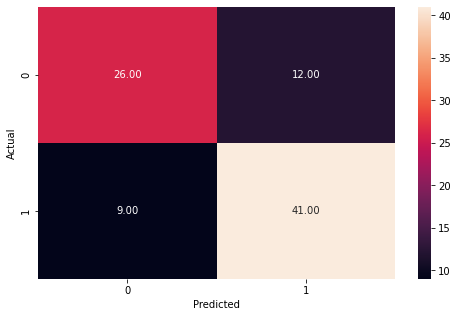

In [75]:
# predict on train set
pred_train_dt = grid_search.predict(X_train)
metrics_score(Y_train, pred_train_dt)

after fine tuning the model perform better

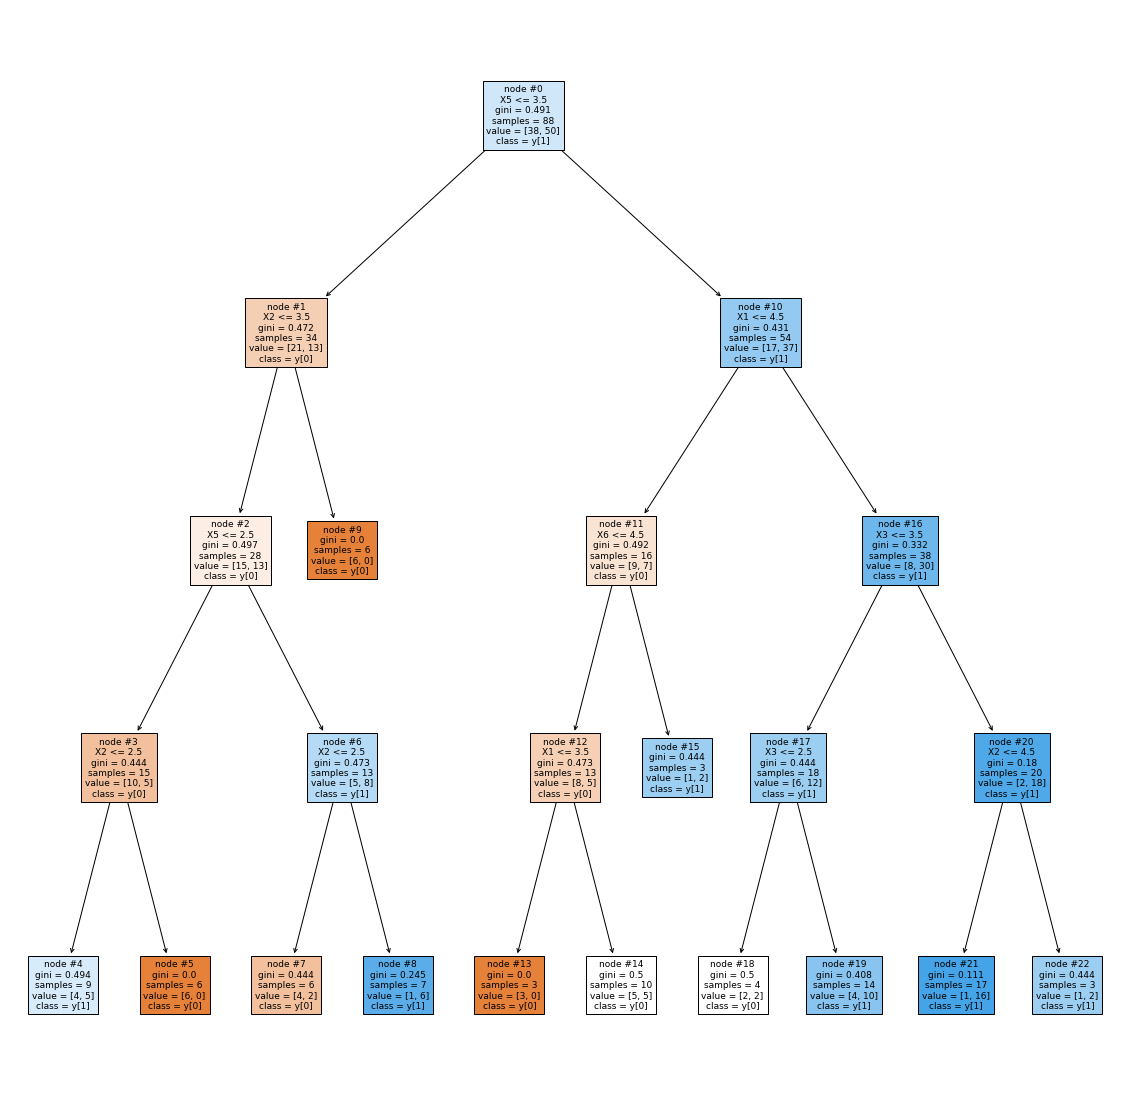

In [77]:
features = list(X.columns)

plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(grid_search.best_estimator_,feature_names=features,max_depth =4, filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [83]:
## lets try to use pruning 
path = dt.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


In [84]:
dts = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dt.fit(X_train, Y_train)
    dts.append(dt)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      dts[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.043485208592160374


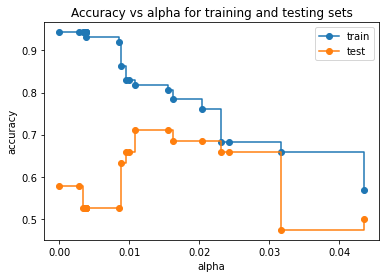

In [85]:
train_scores = [dt.score(X_train, Y_train) for dt in dts]
test_scores = [dt.score(X_test, Y_test) for dt in dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [86]:
dt_pruning = DecisionTreeClassifier(random_state=0, ccp_alpha=0.016)
dt_pruning.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.016, random_state=0)

              precision    recall  f1-score   support

           0       0.68      0.79      0.73        19
           1       0.75      0.63      0.69        19

    accuracy                           0.71        38
   macro avg       0.72      0.71      0.71        38
weighted avg       0.72      0.71      0.71        38



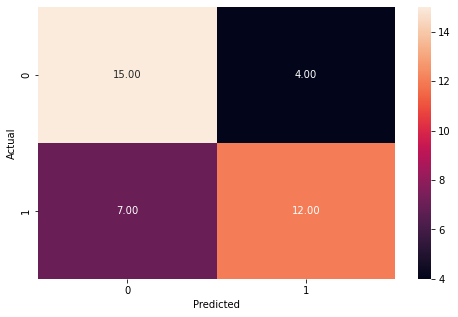

In [87]:
# predict on test set
pred_test_dt_pruning = dt_pruning.predict(X_test)
metrics_score(Y_test, pred_test_dt_pruning)

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        38
           1       0.82      0.84      0.83        50

    accuracy                           0.81        88
   macro avg       0.80      0.80      0.80        88
weighted avg       0.81      0.81      0.81        88



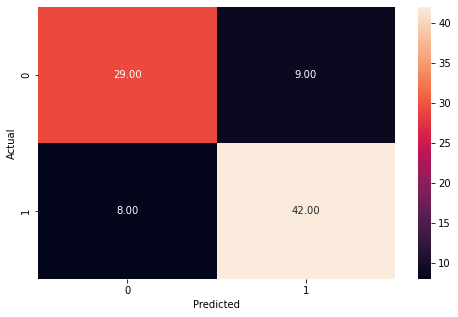

In [89]:
# predict on trin set
pred_train_dt_pruning = dt_pruning.predict(X_train)
metrics_score(Y_train, pred_train_dt_pruning)

Model performance improved

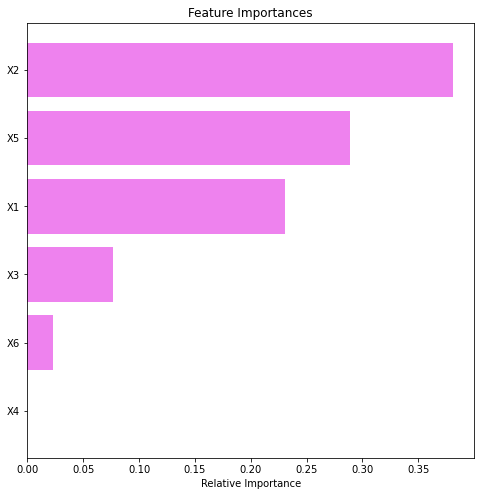

In [91]:
# importance of features in the tree building

feature_names = list(X_train.columns)
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Note that the importance factor related to X4 variable is almost zero so lets remove the variable and cheak the model

In [92]:
## lets remove (X4)
TrainX = X_train.drop(columns = ["X4"], axis=1)
TestX = X_test.drop(columns = ["X4"], axis=1)

In [97]:
dt_pruning = DecisionTreeClassifier(random_state=0, ccp_alpha=0.016)
dt_pruning.fit(TrainX,Y_train)

DecisionTreeClassifier(ccp_alpha=0.016, random_state=0)

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        19
           1       0.72      0.68      0.70        19

    accuracy                           0.71        38
   macro avg       0.71      0.71      0.71        38
weighted avg       0.71      0.71      0.71        38



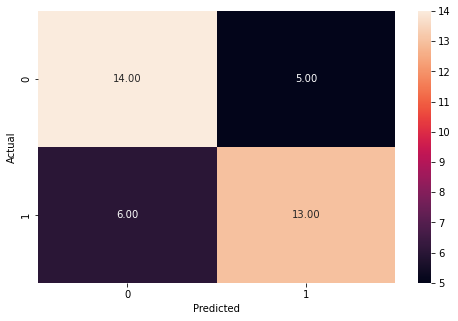

In [98]:
pred_test_dt_pruning = dt_pruning.predict(TestX)
metrics_score(Y_test, pred_test_dt_pruning)

              precision    recall  f1-score   support

           0       0.76      0.74      0.75        38
           1       0.80      0.82      0.81        50

    accuracy                           0.78        88
   macro avg       0.78      0.78      0.78        88
weighted avg       0.78      0.78      0.78        88



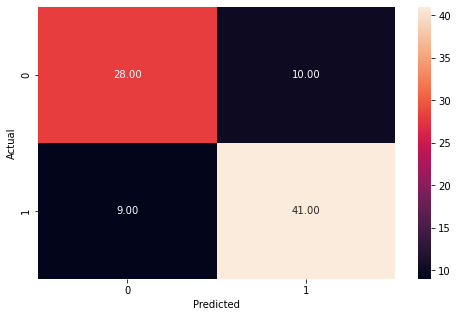

In [99]:
pred_train_dt_pruning = dt_pruning.predict(TrainX)
metrics_score(Y_train, pred_train_dt_pruning)

Note we have 71% accuracy on testing set and 78% on training good this reduce the overfitting and increase the performance

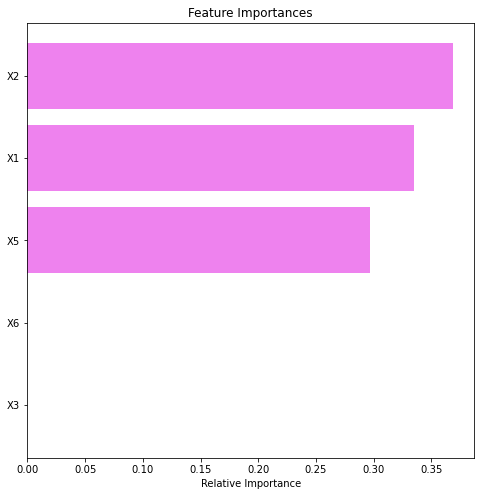

In [101]:
# importance of features in the tree building

feature_names = list(TrainX.columns)
importances = dt_pruning.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

We can note that after this steps the model reduce the importance of variable X3 and X6, lets try to remove them to see the effect

In [102]:
## lets remove (X3 and X6 in addition to X4)
TrainX = X_train.drop(columns = ["X3", "X4", "X6"], axis=1)
TestX = X_test.drop(columns = ["X3", "X4", "X6"], axis=1)

In [103]:
dt_pruning = DecisionTreeClassifier(random_state=0, ccp_alpha=0.016)
dt_pruning.fit(TrainX,Y_train)

DecisionTreeClassifier(ccp_alpha=0.016, random_state=0)

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        19
           1       0.72      0.68      0.70        19

    accuracy                           0.71        38
   macro avg       0.71      0.71      0.71        38
weighted avg       0.71      0.71      0.71        38



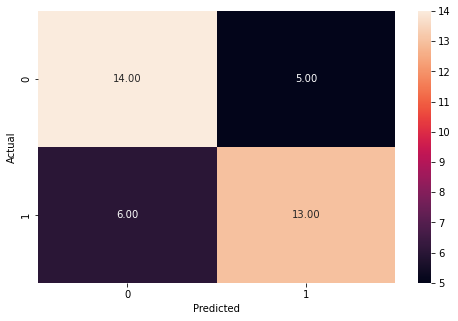

In [104]:
pred_test_dt_pruning = dt_pruning.predict(TestX)
metrics_score(Y_test, pred_test_dt_pruning)

              precision    recall  f1-score   support

           0       0.76      0.74      0.75        38
           1       0.80      0.82      0.81        50

    accuracy                           0.78        88
   macro avg       0.78      0.78      0.78        88
weighted avg       0.78      0.78      0.78        88



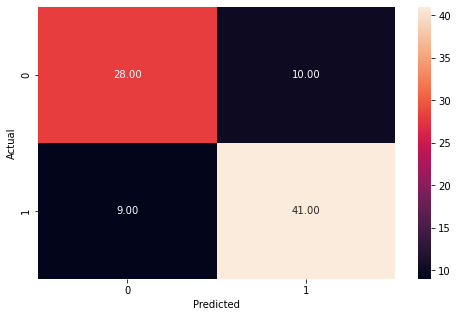

In [105]:
pred_train_dt_pruning = dt_pruning.predict(TrainX)
metrics_score(Y_train, pred_train_dt_pruning)

- there is no change when remove X3 and X6
- upon this model Its clear that the company can mainlly remove questions like question 3, 4 and 6
- the model final accuracy is 71% on testing set and there is a balance between precision and recall
- in this case increasing false positives mean that happy peaple are predicted  as unhappy and this will make the company do more effort to satisfy customers desires, in same time increasing false negatives mean that many peaple who are unhappy are predicted to be happy and this may lose the company many customers so making a balance is more approriate in this case.

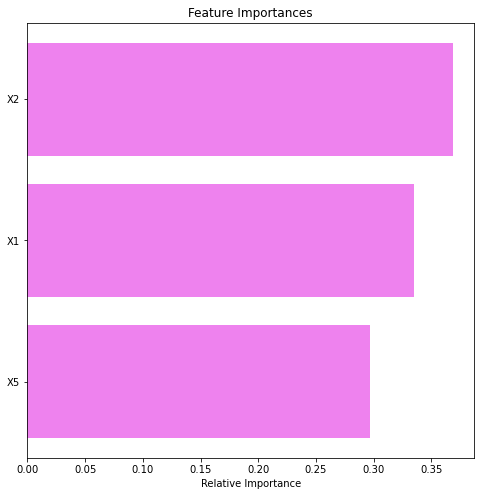

In [108]:
# importance of features in the tree building

feature_names = list(TrainX.columns)
importances = dt_pruning.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()